In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images, test_images = train_images/255, test_images/255

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(392, activation = tf.nn.relu),
    tf.keras.layers.Dense(196, activation = tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(98, activation = tf.nn.relu),
    tf.keras.layers.Dense(49, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 196)               77028     
_________________________________________________________________
batch_normalization (BatchNo (None, 196)               784       
_________________________________________________________________
dropout (Dropout)            (None, 196)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_3 (Dense)              (None, 49)                4851      
__________

In [6]:
model.compile(tf.train.AdamOptimizer(), "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [7]:
model.fit(train_images, train_labels, epochs = 15)

Epoch 1/15
60000/60000 [==============================] - 18s 294us/step - loss: 0.2414 - acc: 0.9258
Epoch 2/15
60000/60000 [==============================] - 11s 182us/step - loss: 0.1241 - acc: 0.9624
Epoch 3/15
60000/60000 [==============================] - 12s 198us/step - loss: 0.0901 - acc: 0.9722
Epoch 4/15
60000/60000 [==============================] - 13s 225us/step - loss: 0.0746 - acc: 0.9772
Epoch 5/15
60000/60000 [==============================] - 13s 225us/step - loss: 0.0618 - acc: 0.9811
Epoch 6/15
60000/60000 [==============================] - 14s 225us/step - loss: 0.0523 - acc: 0.9833
Epoch 7/15
60000/60000 [==============================] - 13s 224us/step - loss: 0.0442 - acc: 0.9861
Epoch 8/15
60000/60000 [==============================] - 14s 228us/step - loss: 0.0408 - acc: 0.9874
Epoch 9/15
60000/60000 [==============================] - 14s 226us/step - loss: 0.0365 - acc: 0.9881
Epoch 10/15
60000/60000 [==============================] - 14s 226us/step - loss: 

In [8]:
predictions = model.predict(test_images)

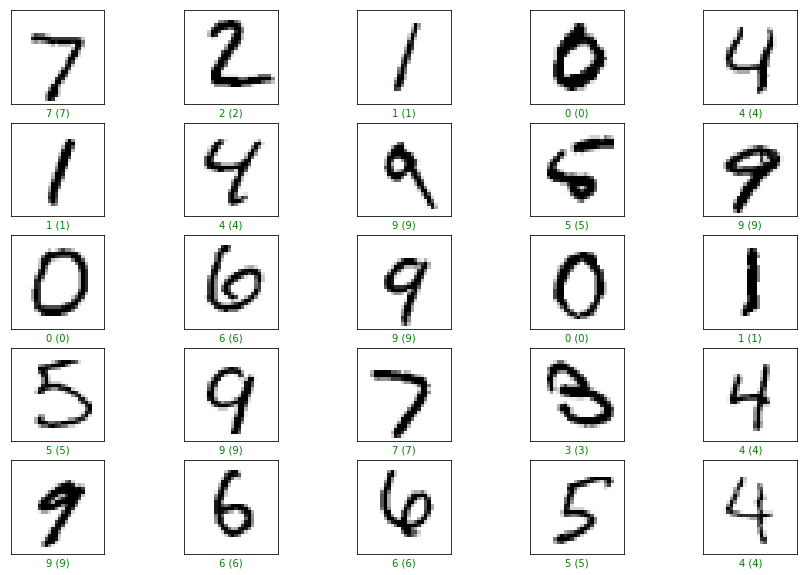

In [10]:
plt.figure(figsize = (15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if test_labels[i] == predictions[i].argmax():
        color = "green"
    else:
        color = "red"
    plt.xlabel("{} ({})".format(test_labels[i],predictions[i].argmax()), color = color)

In [14]:
wrong_pred = np.array([], dtype = int)
for i in range(len(predictions)):
    if predictions[i].argmax() != test_labels[i]:
        wrong_pred = np.append(wrong_pred, i)

*********************************** Predicted(Actual) ***********************************


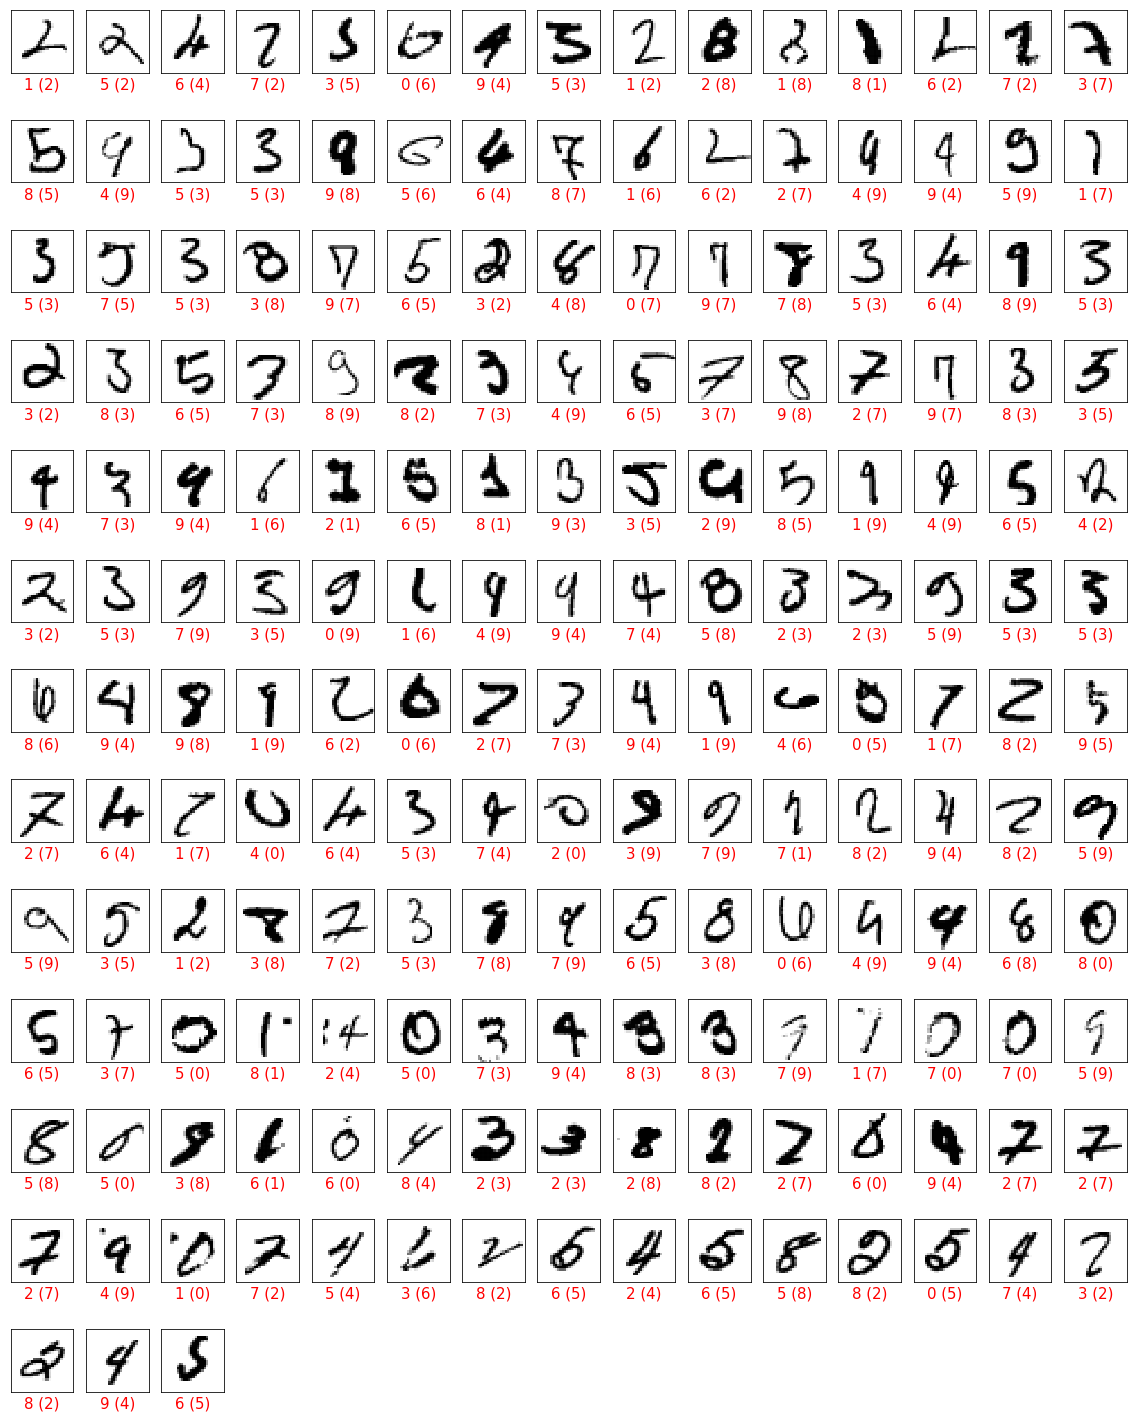

In [17]:
print("*********************************** Predicted(Actual) ***********************************")
plt.figure(figsize = (20,30))
for i,j in zip(range(len(wrong_pred)), wrong_pred):
    plt.subplot(15, 15,i+1)
    plt.xticks([])
    plt.yticks([])
    if predictions[j].argmax() == test_labels[j]:
        color = "green"
    else:
        color = "red"
    plt.imshow(test_images[j], cmap = plt.cm.binary)
    plt.xlabel("{} ({})".format(predictions[j].argmax(), test_labels[j]), color = color, fontsize = 15)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(500, activation = tf.nn.relu),
    tf.keras.layers.Dense(392, activation = tf.nn.relu),
    tf.keras.layers.Dense(196, activation = tf.nn.relu),
    tf.keras.layers.Dense(98, activation = tf.nn.relu),
    tf.keras.layers.Dense(49, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_11 (Dense)             (None, 392)               196392    
_________________________________________________________________
dense_12 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_13 (Dense)             (None, 98)                19306     
_________________________________________________________________
dense_14 (Dense)             (None, 49)                4851      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                500       
Total para

In [24]:
model.compile(tf.train.AdamOptimizer(), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [25]:
model.fit(train_images, train_labels, epochs = 15)

Epoch 1/15
60000/60000 [==============================] - 9s 148us/step - loss: 0.2196 - acc: 0.9339
Epoch 2/15
60000/60000 [==============================] - 10s 166us/step - loss: 0.1028 - acc: 0.9704
Epoch 3/15
60000/60000 [==============================] - 13s 217us/step - loss: 0.0746 - acc: 0.9783
Epoch 4/15
60000/60000 [==============================] - 13s 210us/step - loss: 0.0585 - acc: 0.9826
Epoch 5/15
60000/60000 [==============================] - 12s 199us/step - loss: 0.0487 - acc: 0.9858
Epoch 6/15
60000/60000 [==============================] - 12s 200us/step - loss: 0.0408 - acc: 0.9881
Epoch 7/15
60000/60000 [==============================] - 12s 200us/step - loss: 0.0374 - acc: 0.9890
Epoch 8/15
60000/60000 [==============================] - 12s 199us/step - loss: 0.0325 - acc: 0.9906
Epoch 9/15
60000/60000 [==============================] - 12s 200us/step - loss: 0.0288 - acc: 0.9922
Epoch 10/15
60000/60000 [==============================] - 12s 200us/step - loss: 0

In [28]:
predictions = model.predict(test_images)

In [29]:
wrong_pred = np.array([], dtype = int)
for i in range(len(predictions)):
    if predictions[i].argmax() != test_labels[i]:
        wrong_pred = np.append(wrong_pred, i)

In [30]:
len(wrong_pred)

180

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(500, activation = tf.nn.relu, kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(392, activation = tf.nn.relu, kernel_initializer = "he_normal" ),
    tf.keras.layers.Dense(196, activation = tf.nn.relu, kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(98, activation = tf.nn.relu, kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(49, activation = tf.nn.relu, kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [33]:
model.compile(tf.train.AdamOptimizer(), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [34]:
model.fit(train_images, train_labels, epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.2127 - acc: 0.93670s - loss: 0.2166 - 
Epoch 2/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.1029 - acc: 0.9696
Epoch 3/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0745 - acc: 0.9788
Epoch 4/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0600 - acc: 0.9820
Epoch 5/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0507 - acc: 0.9858
Epoch 6/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.0435 - acc: 0.9876
Epoch 7/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.0375 - acc: 0.9890
Epoch 8/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0331 - acc: 0.9908
Epoch 9/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0285 - acc: 0.9918
Epoch 10/20
60000/60000 [==============================] - 12s

In [35]:
predictions = model.predict(test_images)

wrong_pred = np.array([], dtype = int)
for i in range(len(predictions)):
    if predictions[i].argmax() != test_labels[i]:
        wrong_pred = np.append(wrong_pred, i)
        

len(wrong_pred)

188